<a href="https://colab.research.google.com/github/wangrosscoder/biyefile/blob/main/%E2%80%9Cdemo_refactored_dianping_classification_with_BERT_fastai_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
from fastai.text import *

In [126]:
from google.colab import files

In [127]:
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving dp.csv to dp.csv
User uploaded file "dp.csv" with length 3312858 bytes


In [128]:
#files.download('dianping.csv')

In [129]:
import pandas as pd

In [130]:
#!wget https://github.com/wangrosscoder/biyefile/dianping.csv

In [131]:
df = pd.read_csv("dp.csv",encoding='latin-1')

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
train, test = train_test_split(df, test_size=.2, random_state=2)

In [134]:
train, valid = train_test_split(train, test_size=.2, random_state=2)

In [135]:
len(train)

186

In [136]:
len(valid)

47

In [137]:
len(test)

59

In [138]:
train.head()

,comment,sentiment
272,"ÎªÁË½â¾ö³£¹æÖ±Á÷²»ÄÜµ¥¶ÀËÍ·çµçµÄÎÊÌâ,·ÖÎöÁË·çµ...",1
240,ÎªÁË¶ÔÖ÷¶¯ÅäµçÍøÖÐµÄ¿É¿Ø·Ö²¼Ê½·¢µçµ¥Ôª¡¢´¢ÄÜÒÔ...,0
188,Îª±ÜÃâ¹ÂµºÖ±Á÷Î¢ÍøÖÐÐîµç³ØµÄÉî¶È³ä·ÅµçÒÔÑÓ³¤Æä...,0
164,"ÎªÁËÌá¸ßÎ¢ÍøÖÐ´¢ÄÜÏµÍ³µÄÎÈ¶¨ÐÔ,³ä·Ö·¢»ÓÆä¹¦ÂÊË...",0
144,ÎªÁËÂú×ãÐ¡ÐÍ»¯¡¢ÖØÆµ»¯Âö³å¹¦ÂÊ×°ÖÃÔÚÎÞÊÐµç¹©Ó¦...,0


In [139]:
!pip uninstall urllib3y
!pip install --upgrade urllib3

  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [140]:
!pip install pytorch-transformers

  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.8
    Uninstalling urllib3-1.26.8:
      Successfully uninstalled urllib3-1.26.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [141]:
from pytorch_transformers import BertTokenizer, BertForSequenceClassification

In [142]:
bert_model = "bert-base-chinese"
max_seq_len = 128
batch_size = 32

In [143]:
bert_tokenizer = BertTokenizer.from_pretrained(bert_model)

In [144]:
list(bert_tokenizer.vocab.items())[2000:2005]

[('姗', 2000), ('姚', 2001), ('姜', 2002), ('姝', 2003), ('姣', 2004)]

In [145]:
bert_vocab = Vocab(list(bert_tokenizer.vocab.keys()))

In [146]:
class BertFastaiTokenizer(BaseTokenizer):
    def __init__(self, tokenizer, max_seq_len=128, **kwargs):
        self.pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t):
        return ["[CLS]"] + self.pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]

In [147]:
tok_func = BertFastaiTokenizer(bert_tokenizer, max_seq_len=max_seq_len)

In [148]:
bert_fastai_tokenizer = Tokenizer(
    tok_func=tok_func,
    pre_rules = [],
    post_rules = []
)

In [149]:
path = Path(".")

In [150]:
databunch = TextClasDataBunch.from_df(path, train, valid, test,
                  tokenizer=bert_fastai_tokenizer,
                  vocab=bert_vocab,
                  include_bos=False,
                  include_eos=False,
                  text_cols="comment",
                  label_cols='sentiment',
                  bs=batch_size,
                  collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
             )

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [151]:
databunch.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
"[CLS] [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] , [UNK] · [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] , [UNK] » [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] , [UNK] [UNK] [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] ( [UNK] ) · [UNK] · [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] · [UNK] , [UNK] [UNK] [UNK] [UNK] [UNK] »",0
"[CLS] [UNK] [UNK] [UNK] [UNK] [UNK] , [UNK] [UNK] [UNK] [UNK] [UNK] » [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] · [UNK] , [UNK] 15 . [UNK] [UNK] » [UNK] , » · [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] ; [UNK] » [UNK] · [UNK] » [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] : [UNK] [UNK] [UNK]",0
"[CLS] · [UNK] · [UNK] « [UNK] [UNK] [UNK] » [UNK] [UNK] [UNK] [UNK] » [UNK] · [UNK] · [UNK] » [UNK] » [UNK] » [UNK] [UNK] · [UNK] » [UNK] » [UNK] » [UNK] , [UNK] » [UNK] · [UNK] » [UNK] » [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] » [UNK] » [UNK] [UNK] [UNK] » ÷ · [UNK] » [UNK] [UNK] [UNK] »",1
"[CLS] [UNK] · [UNK] » [UNK] , [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] [UNK] [UNK] « [UNK] [UNK] [UNK] · [UNK] » [UNK] ( do ##ub ##ly fed in ##du ##ction ge ##ner ##ator , [UNK] ) [UNK] [UNK] [UNK] [UNK] [UNK] , [UNK] [UNK] [UNK] · [UNK] » [UNK] , [UNK] [UNK] [UNK] » [UNK] [UNK] [UNK] [UNK] [UNK] , [UNK] [UNK] [UNK] « [UNK]",1
"[CLS] [UNK] ( bat ##ter ##y energy st ##orage system , [UNK] ) [UNK] [UNK] [UNK] » [UNK] , · [UNK] · [UNK] [UNK] [UNK] [UNK] [UNK] « [UNK] , [UNK] [UNK] [UNK] [UNK] « [UNK] [UNK] [UNK] · [UNK] , [UNK] » [UNK] · [UNK] · [UNK] ; [UNK] » [UNK] [UNK] [UNK] [UNK] [UNK] · [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] , [UNK]",0


In [152]:
class MyNoTupleModel(BertForSequenceClassification):
  def forward(self, *args, **kwargs):
    return super().forward(*args, **kwargs)[0]

In [153]:
bert_pretrained_model = MyNoTupleModel.from_pretrained(bert_model, num_labels=2)

In [154]:
loss_func = nn.CrossEntropyLoss()

In [155]:
learn = Learner(databunch, 
                bert_pretrained_model,
                loss_func=loss_func,
                metrics=accuracy)

In [156]:
learn.lr_find()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


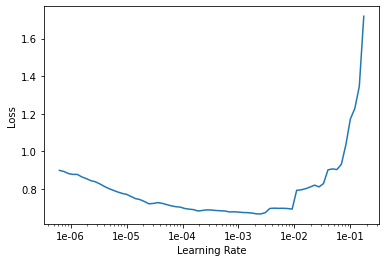

In [157]:
learn.recorder.plot()

In [158]:
learn.fit_one_cycle(2, 2e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.802673,0.636598,0.659574,00:09
1,0.696790,0.641492,0.659574,00:09


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [159]:
def dumb_series_prediction(n):
  preds = []
  for loc in range(n):
    preds.append(int(learn.predict(test.iloc[loc]['comment'])[1]))
  return preds

In [160]:
preds = dumb_series_prediction(len(test))

In [161]:
preds[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

In [163]:
print(classification_report(test.sentiment, preds))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        36
           1       0.00      0.00      0.00        23

    accuracy                           0.61        59
   macro avg       0.31      0.50      0.38        59
weighted avg       0.37      0.61      0.46        59



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
print(confusion_matrix(test.sentiment, preds))

[[36  0]
 [23  0]]
